In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
from zipfile import ZipFile
import os
os.chdir(r"C:\Users\Pranjali\Downloads")
gdf = gpd.read_file('india-village-census-2001-PB.shp')

In [5]:
district = gdf[['DISTRICT', 'geometry']]
districts = gdf.dissolve(by='DISTRICT', aggfunc = 'mean')

In [8]:
districts

geometry           UID  \
DISTRICT                                                                    
1         POLYGON ((-15747.54936337488 3521141.84325849,...  27010.900123   
2         POLYGON ((-75884.03000927856 3462840.952488032...  29208.691259   
3         (POLYGON ((13801.02232977276 3469135.012640218...  30478.739628   
4         POLYGON ((9635.30743411096 3441312.798397752, ...  31355.847668   
5         POLYGON ((8347.70058149047 3482306.955827771, ...  28855.165850   
6         POLYGON ((24959.78271951713 3439981.795251096,...  32139.913684   
7         POLYGON ((103233.5384137789 3415323.124216633,...  33277.211111   
8         POLYGON ((73772.77860842436 3389670.077434562,...  35410.031180   
9         POLYGON ((47675.83159548324 3403612.647575425,...  34208.899676   
10        POLYGON ((-36992.60729410104 3397177.920148426...  34130.867868   
11        POLYGON ((-104461.0832112022 3427566.435139159...  34652.238894   
12        POLYGON ((-105310.3065214283 3357218.983946138...  37146.432773   
13        POLYGON ((-71822.10432908381 3378212.688855896...  35466.609195   
14        POLYGON ((-55111.81536266301 3330659.103307411...  37753.621160   
15        POLYGON ((-11101.67482246936 3306920.78019952,...  38541.093496   
16        POLYGON ((-5658.39465930732 3311379.832086124,...  37191.180556   
17        (POLYGON ((10057.78108133393 3320129.900250311...  37110.353958   

            CENSUS_COD  STATE  SUB_DIST     TOWN_VILL  WARD   EB       No_HH  \
DISTRICT                                                                       
1         3.010001e+14    3.0  3.104167  4.242482e+05   0.0  0.0  224.320466   
2         3.020004e+14    3.0  3.542903  6.722921e+05   0.0  0.0  429.132318   
3         3.030000e+14    3.0  2.493562  7.199710e+05   0.0  0.0  194.426323   
4         3.040003e+14    3.0  3.139896  1.023402e+06   0.0  0.0  375.989637   
5         3.050000e+14    3.0  2.431770  8.556867e+05   0.0  0.0  195.874038   
6         3.060000e+14    3.0  1.391579  9.510427e+05   0.0  0.0  226.435789   
7         3.070000e+14    3.0  2.124444  1.171479e+06   0.0  0.0  228.837778   
8         3.080000e+14    3.0  2.336303  1.194986e+06   0.0  0.0  205.779510   
9         3.090004e+14    3.0  3.829558  1.335859e+06   0.0  0.0  602.642934   
10        3.100000e+14    3.0  2.582583  1.361063e+06   0.0  0.0  456.480480   
11        3.110001e+14    3.0  2.518263  1.302545e+06   0.0  0.0  297.247779   
12        3.120000e+14    3.0  2.004202  1.683194e+06   0.0  0.0  569.084034   
13        3.130000e+14    3.0  1.241379  1.722281e+06   0.0  0.0  559.885057   
14        3.140000e+14    3.0  2.044369  2.290203e+06   0.0  0.0  713.286689   
15        3.150000e+14    3.0  2.060976  1.898557e+06   0.0  0.0  496.402439   
16        3.160002e+14    3.0  3.126389  2.079712e+06   0.0  0.0  485.672222   
17        3.170001e+14    3.0  3.102821  1.729018e+06   0.0  0.0  294.344859   

                TOT_P  ...     TW_W_EL   TANK_IRR  RIVER_IRR  LAKE_IRR  \
DISTRICT               ...                                               
1         1289.443015  ...   72.746936   0.456495   0.298407  0.022672   
2         2455.816359  ...  124.194868   0.732959   0.000000  0.000000   
3         1074.286123  ...  132.864092   0.484979   0.131617  0.000000   
4         2027.059067  ...  173.680829   0.007254   0.000000  0.000000   
5         1036.204339  ...   41.424073  35.255423   0.337999  0.296011   
6         1234.736842  ...  111.884211   0.000000   0.000000  0.000000   
7         1240.120000  ...   81.698889   0.800000   0.671111  0.060000   
8         1186.563474  ...  164.979955   0.663697   0.000000  0.000000   
9         3271.662352  ...  198.747573   0.305286   0.034520  0.000000   
10        2658.102102  ...  237.957958   0.549550   0.063063  0.000000   
11        1723.698914  ...  138.483712   0.000000   0.000000  0.000000   
12        3266.777311  ...   16.924370   0.000000   0.000000  0.000000   
13        3156.752874  ...   9

In [10]:
#Sensitivity indicators
#Total population
popln = []
pindex = []
for i in range(1,18):
        popln.append(districts['TOT_P'][i])
for i in range(17):
    index = (popln[i]-min(popln))/(max(popln)-min(popln))
    pindex.append(index)

In [11]:
#tribal population
scst = []
scstindex = []
for i in range(1,18):
        scst.append((districts['SC_P'][i]+districts['ST_P'][i]))
for i in range(17):
    index = (scst[i]-min(scst))/(max(scst)-min(scst))
    scstindex.append(index)

In [14]:
#tribal female
scstf = []
scstfindex = []
for i in range(1,18):
        scstf.append((districts['SC_F'][i]+districts['ST_F'][i]))
for i in range(17):
    index = (scstf[i]-min(scstf))/(max(scstf)-min(scstf))
    scstfindex.append(index)

In [15]:
#infants population
infants = []
infindex = []
for i in range(1,18):
        infants.append((districts['P_06'][i]))
for i in range(17):
    index = (infants[i]-min(infants))/(max(infants)-min(infants))
    infindex.append(index)

In [17]:
#Total Illiterate 
illit = []
illitindex = []
for i in range(1,18):
        illit.append((districts['P_ILL'][i]))
for i in range(17):
    index = (illit[i]-min(illit))/(max(illit)-min(illit))
    illitindex.append(index)

In [18]:
# male Illiterate 
millit = []
millitindex = []
for i in range(1,18):
        millit.append((districts['M_ILL'][i]))
for i in range(17):
    index = (millit[i]-min(millit))/(max(millit)-min(millit))
    millitindex.append(index)

In [19]:
#Unirrigated area
unirra = []
unirrindex = []
for i in range(1,18):
        unirra.append((districts['UN_IRR'][i]))
for i in range(17):
    index = (unirra[i]-min(unirra))/(max(unirra)-min(unirra))
    unirrindex.append(index)

In [20]:
#Adaptive capacity indicators
#Irrigated area
irra = []
irrindex = []
for i in range(1,18):
        irra.append((districts['TOT_IRR'][i]))
for i in range(17):
    index = (irra[i]-min(irra))/(max(irra)-min(irra))
    irrindex.append(index)

In [21]:
#Electricity used in agriculture
power = []
powerindex = []
for i in range(1,18):
        power.append((districts['POWER_AGR'][i]))
for i in range(17):
    index = (power[i]-min(power))/(max(power)-min(power))
    powerindex.append(index)

In [22]:
#agriculture workers
alwork = []
alworkindex = []
for i in range(1,18):
        alwork.append((districts['MAIN_AL_P'][i]))
for i in range(17):
    index = (power[i]-min(power))/(max(power)-min(power))
    alworkindex.append(index)

In [23]:
#income
inc =[]
incindex=[]
for i in range(1,18):
        inc.append((districts['TOT_INC'][i]))
for i in range(17):
    index = (inc[i]-min(inc))/(max(inc)-min(inc))
    incindex.append(index)

In [24]:
#total literate 
lit = []
litindex = []
for i in range(1,18):
        lit.append((districts['P_LIT'][i]))
for i in range(17):
    index = (lit[i]-min(lit))/(max(lit)-min(lit))
    litindex.append(index)

In [25]:
#medical facilities(no.of hospitals and dispensaries)
hosp =[]
hospindex=[]
for i in range(1,18):
        hosp.append((districts['ALL_HOSP'][i]+districts['AYU_HOSP'][i]+districts['UN_HOSP'][i]+districts['HOM_HOSP'][i]+districts['ALL_DISP'][i]+districts['AYU_DISP'][i]+districts['UN_DISP'][i]+districts['HOM_DISP'][i]))
for i in range(17):
    index = (hosp[i]-min(hosp))/(max(hosp)-min(hosp))
    hospindex.append(index)

In [26]:
#no. of private doctors
pdr =[]
pdrindex=[]
for i in range(1,18):
        pdr.append((districts['RMP'][i]))
for i in range(17):
    index = (pdr[i]-min(pdr))/(max(pdr)-min(pdr))
    pdrindex.append(index)

In [27]:
#no. of subsided doctors
sdr =[]
sdrindex=[]
for i in range(1,18):
        sdr.append((districts['RMP'][i]))
for i in range(17):
    index = (sdr[i]-min(sdr))/(max(sdr)-min(sdr))
    sdrindex.append(index)

In [28]:
#main workers
aworker =[]
aworkindex=[]
for i in range(1,18):
        aworker.append((districts['MAINWORK_P'][i]))
for i in range(17):
    index = (aworker[i]-min(aworker))/(max(aworker)-min(aworker))
    aworkindex.append(index)

In [31]:
#marginal workers
mworker =[]
mworkindex=[]
for i in range(1,18):
        mworker.append((districts['MARGWORK_P'][i]))
for i in range(17):
    index = (mworker[i]-min(mworker))/(max(mworker)-min(mworker))
    mworkindex.append(index)

In [33]:
pw=[]
tw=[]
t1w=[]
fw=[]
iw=[]
pin=[]
t=[]
inf=[]
unirr=[]
illite=[]
for i in range(len(popln)):
    pw.append(((scst[i]+infants[i])/popln[i]))
    tw.append((0.5-(scst[i]/popln[i])))
    t1w.append(scstf[i]/scst[i])
    fw.append((1-(scstf[i]/scst[i])))
    iw.append((0.5-(infants[i]/popln[i])))
    pin.append(0.33*0.33*(pw[i]*pindex[i]))
    t.append(0.33*0.33*(tw[i]*(t1w[i]*scstindex[i]+fw[i]*scstfindex[i])))
    inf.append(0.33*0.33*(iw[i]*infindex[i]))
    unirr.append(0.33*0.33*unirrindex[i])
    illite.append(0.33*0.33*((millit[i]/illit[i])*illitindex[i]+(1-(millit[i]/illit[i]))*millitindex[i]))

In [34]:
S=[]
for i in range(17):
    S.append(pin[i]+t[i]+inf[i]+unirr[i]+illite[i])

In [35]:
#adaptive capacity
a=[]
income=[]
m=[]
w=[]
lite=[]
for i in range(17):
    a.append(0.33*0.2*0.33*(powerindex[i]+irrindex[i]+alworkindex[i]))
    income.append(0.33*0.2*incindex[i])
    if(sdr[i]>=pdr[i]):
        m.append(0.33*0.2*(0.5*hospindex[i]+0.5*(sdr[i]/(sdr[i]+pdr[i]))*sdrindex[i]+0.5*(pdr[i]/(sdr[i]+pdr[i]))*pdrindex[i]))
    else:
        m.append(0.33*0.2*(0.5*hospindex[i]+0.5*(pdr[i]/(sdr[i]+pdr[i]))*sdrindex[i]+0.5*(sdr[i]/(sdr[i]+pdr[i]))*pdrindex[i]))
    if(aworker[i]>=mworker[i]):
        w.append(0.33*0.2*((aworker[i]/(aworker[i]+mworker[i]))*aworkindex[i]+(mworker[i]/(aworker[i]+mworker[i]))*mworkindex[i]))
    else:
        w.append(0.33*0.2*((mworker[i]/(aworker[i]+mworker[i]))*aworkindex[i]+(aworker[i]/(aworker[i]+mworker[i]))*mworkindex[i]))
    lite.append(0.33*0.2*litindex[i])

In [36]:
A=[]
for i in range(17):
    A.append(a[i]+income[i]+m[i]+w[i]+lite[i])

In [37]:
import pandas as pd
exp = pd.read_excel(r"D:\rlindex-1951-1980-pb.xlsx")

In [38]:
E1 = 0.33*0.25*(exp['r1index']+exp['r2index']+exp['r3index']+exp['r5index'])
E=[]
for i in range(17):
    E.append(E1[i])

In [39]:
V = []
for i in range(17):
    V.append(S[i]+E[i]-A[i])

In [40]:
districts['code']=[i for i in range(1,18)]

In [41]:
districts['vindex1']=V
dist = districts[['code','vindex1']]
data_for_map = dist.rename(index=str, columns={'code':'C','vindex1':'vulnerability'})
merged = districts.set_index('code').join(data_for_map.set_index('C'))

In [54]:
V.index(min(V))

15

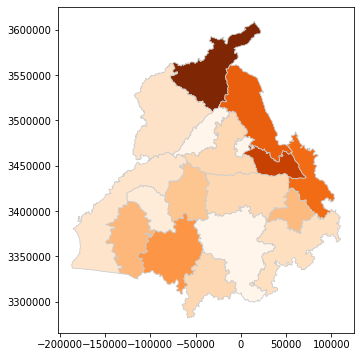

In [42]:
variable = 'vindex1'
# set the range for the choropleth
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))                                                                                 
merged.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8')